In [2]:
%load_ext autoreload

In [77]:
%autoreload 2
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import minopy_utilities as mnp
import mintpy
import gdal
from mintpy.utils import plot as pp
from mintpy.utils import readfile, utils as ut 
import h5py
import cartopy.crs as ccrs
from scipy import ndimage
from mintpy import view
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

view.py /Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_velocity.h5 velocity -m /Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_maskTempCoh.h5 --notitle --fontsize 12 --nocbar --alpha 0.9 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noverbose --noreference --dem /Volumes/SaraMNew/scratch/DEM_Ecuador/demLat_S02_N02_Lon_W080_W076.dem.wgs84 --contour-step 400 --contour-smooth 0.0 --shade-az 45 --shade-exag 0.01 --shade-min -4000 --shade-max 4000 --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 --wrap --wrap-range -3 3
view.py /Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_temporalCoherence.h5 --notitle --fontsize 12 --nocbar --alpha 0.9 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noverbose --noreference --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 -v 0 1 --noscalebar
Un-scalable display unit: cm
view.py /Volumes/SaraMNew/scratch/minopy_subsets/

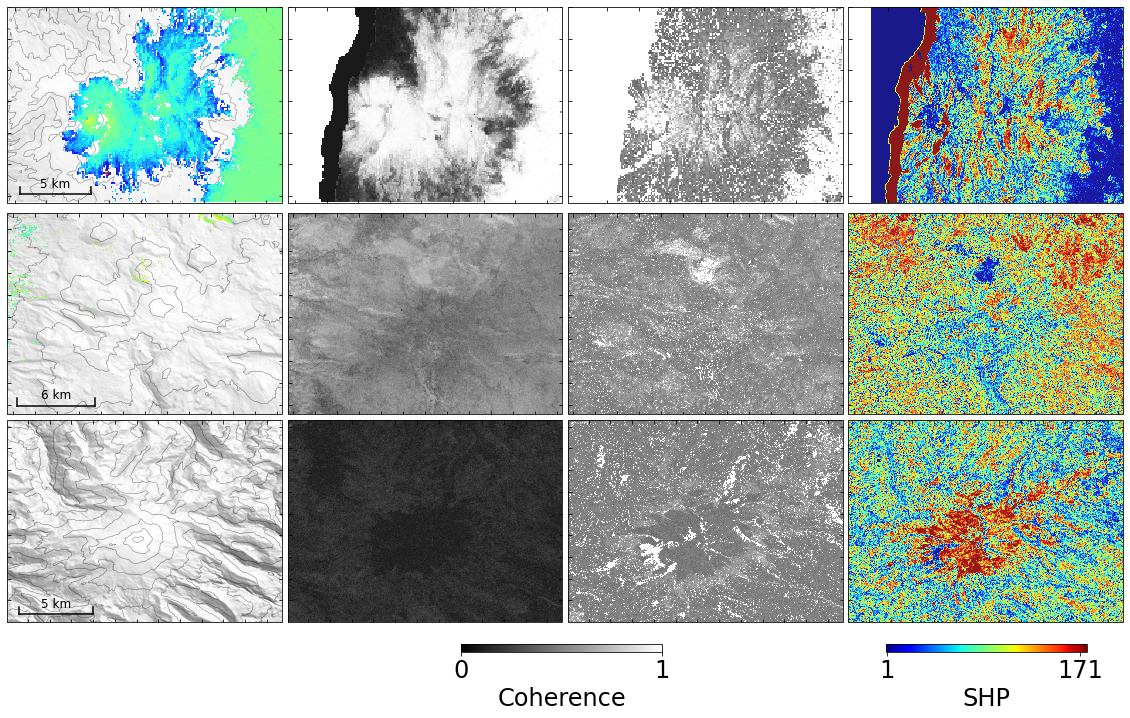

In [65]:
font = {'family' : 'DejaVu Sans',
        'size'   : 10}

matplotlib.rc('font', **font)

fsize = 12

#points_lalo = np.array([(-0.1718, -78.6134), (-0.1694, -78.6080)])

dem_file_1 = os.path.expanduser('/Volumes/SaraMNew/scratch/DEM_Ecuador/demLat_S02_N02_Lon_W080_W076.dem.wgs84')
dem_file_2 = os.path.expanduser('/Volumes/SaraMNew/scratch/DEM_Baker_Lassen/dem.dem.wgs84')



factor = [3]


# options for view.py

opt = ' --notitle --fontsize 12 --nocbar --alpha 0.9 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm '
opt += ' --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 '
opt += ' --noverbose --noreference' #.format(reflat, reflon)


fig, axs = plt.subplots(nrows=3, ncols=4, 
                        figsize=(20,11.4), subplot_kw=dict(projection=ccrs.PlateCarree()))


## Plot Pichincha

box = ['-0.225:-0.10','-78.665:-78.49'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[0,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_pich = '/Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_velocity.h5'
mask_pich = '/Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_pich, mask_pich) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_1)
cmd += ' --shade-exag 0.01 --shade-min -4000 --shade-max 4000 '
cmd += ' --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 '
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

# temp Coh mintpy
ax = axs[0,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/EcuadorChunch1SSenDT142/mintpy/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# temp Coh minopy
ax = axs[0,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im1, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[0,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat -0.225 -0.100 --sub-lon -78.665 -78.49 '
#cmd += ' -v 0 1 '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im2, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

######################################################
# Plot Lassen

box = ['40.392:40.575','-121.645:-121.395'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_Lass = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_velocity.h5'
mask_Lass = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_Lass, mask_Lass) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
cmd += ' --shade-exag 0.1 --shade-min -3000 --shade-max 3000 '
cmd += ' --sub-lat 40.392 40.575 --sub-lon -121.645 -121.395 '
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

# temp Coh mintpy
ax = axs[1,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 40.392 40.575 --sub-lon -121.645 -121.395 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# temp Coh minopy
ax = axs[1,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 40.392 40.575 --sub-lon -121.645 -121.395 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[1,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 40.392 40.575 --sub-lon -121.645 -121.395 '
#cmd += ' -v 0 1 '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


####################################################################
# Plot Baker

box = ['48.70:48.8860','-121.9390:-121.6861'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[2,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_Bak = '/Volumes/SaraMNew/scratch/mintpy_subsets/BakerSenDT115/geo/geo_velocity.h5'
mask_Bak = '/Volumes/SaraMNew/scratch/mintpy_subsets/BakerSenDT115/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_Bak, mask_Bak) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
cmd += ' --shade-exag 0.1 --shade-min -4000 --shade-max 3000 '
cmd += ' --sub-lat 48.70 48.8860 --sub-lon -121.9390 -121.6861 '
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

# temp Coh mintpy
ax = axs[2,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/mintpy_subsets/BakerSenDT115/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 48.70 48.8860 --sub-lon -121.9390 -121.6861 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

# temp Coh minopy
ax = axs[2,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/BakerSenDT115/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 48.70 48.8860 --sub-lon -121.9390 -121.6861 '
cmd += ' -v 0 1 '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[2,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/BakerSenDT115/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat 48.70 48.8860 --sub-lon -121.9390 -121.6861 '
#cmd += ' -v 0 1 '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]



cax1 = fig.add_axes([0.44, 0.09, 0.14, 0.01])
cbar = plt.colorbar(im1, cax=cax1, ticks=[0, 1], orientation='horizontal')
cbar.set_label('Coherence', fontsize=24, color = "black")
cbar.ax.set_xticklabels([r'0', r'1'], fontsize=24)
cbar.ax.xaxis.set_label_position('bottom') 
cbar.ax.xaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black')

cax2 = fig.add_axes([0.735, 0.09, 0.14, 0.01])
cbar = plt.colorbar(im2, cax=cax2, ticks=[1, 165], orientation='horizontal')
cbar.set_label('SHP', fontsize=24, color = "black")
cbar.ax.set_xticklabels([r'1', r'171'], fontsize=24)
cbar.ax.xaxis.set_label_position('bottom') 
cbar.ax.xaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black')


fig.subplots_adjust(hspace=0.02, wspace=0.02)

plt.savefig('simulation/coherence_shp1.png', bbox_inches='tight') 
plt.show()

view.py /Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_velocity.h5 velocity -m /Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_maskTempCoh.h5 --notitle --fontsize 12 --nocbar --alpha 0.9 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noverbose --noreference --dem /Volumes/SaraMNew/scratch/DEM_Ecuador/demLat_S02_N02_Lon_W080_W076.dem.wgs84 --contour-step 400 --contour-smooth 0.0 --shade-az 45 --shade-exag 0.01 --shade-min -4000 --shade-max 4000 --sub-lat -0.225 -0.1 --sub-lon -78.64 -78.515 --wrap --wrap-range -1 1
view.py /Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_temporalCoherence.h5 --notitle --fontsize 12 --nocbar --alpha 0.9 --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 --noverbose --noreference --sub-lat -0.225 -0.1 --sub-lon -78.64 -78.515 -v 0 1 -c gray --noscalebar
Un-scalable display unit: cm
view.py /Volumes/SaraMNew/scratch/minop

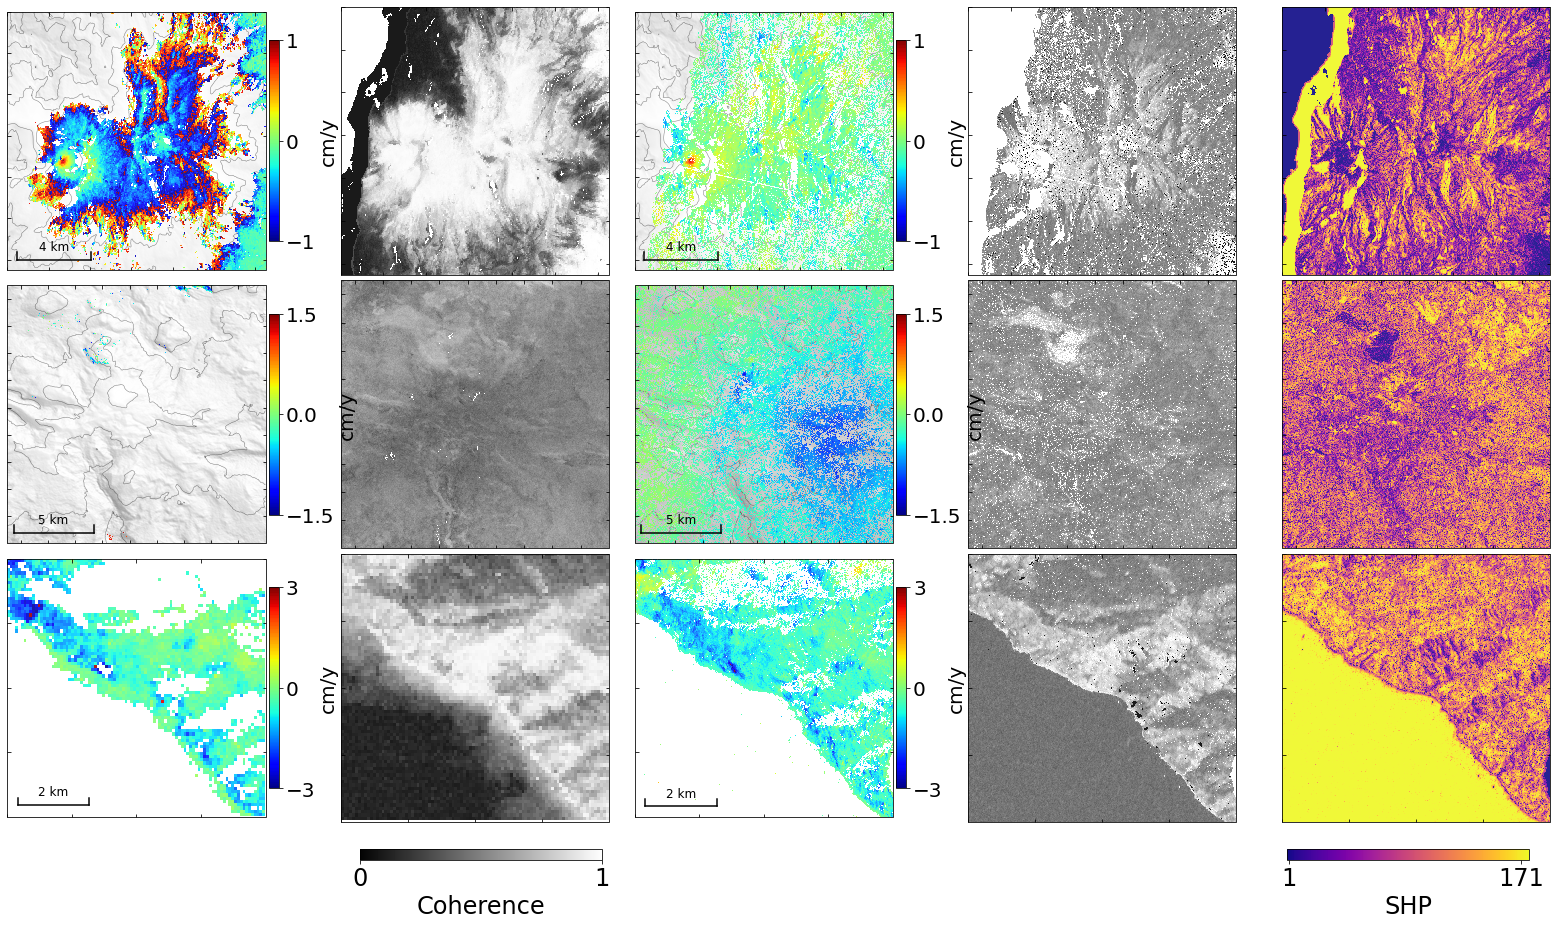

In [112]:
font = {'family' : 'DejaVu Sans',
        'size'   : 10}

matplotlib.rc('font', **font)

fsize = 12
plt.rcParams["font.size"] = "20"
#points_lalo = np.array([(-0.1718, -78.6134), (-0.1694, -78.6080)])

dem_file_1 = os.path.expanduser('/Volumes/SaraMNew/scratch/DEM_Ecuador/demLat_S02_N02_Lon_W080_W076.dem.wgs84')
dem_file_2 = os.path.expanduser('/Volumes/SaraMNew/scratch/DEM_Baker_Lassen/dem.dem.wgs84')



factor = [1]


# options for view.py

opt = ' --notitle --fontsize 12 --nocbar --alpha 0.9 '
opt += ' --lalo-step 0.02 --lalo-loc 0 0 0 0 -u cm '
opt += ' --scalebar 0.28 0.18 0.04 --scalebar-pad 0.05 '
opt += ' --noverbose --noreference' #.format(reflat, reflon)


fig, axs = plt.subplots(nrows=3, ncols=5, 
                        figsize=(28,15), subplot_kw=dict(projection=ccrs.PlateCarree()))


## Plot Pichincha

#box = ['-0.225:-0.10','-78.665:-78.49'] 
box = ['-0.225:-0.10','-78.64:-78.515'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[0,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_pich = '/Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_velocity.h5'
mask_pich = '/Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_pich, mask_pich) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_1)
cmd += ' --shade-exag 0.01 --shade-min -4000 --shade-max 4000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-1, 0, 1])
cbar_top.set_label('cm/y')

# temp Coh mintpy
ax = axs[0,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/mintpy_subsets/PichinchaSenDT142/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

## Plot Pichincha minopy
ax = axs[0,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_pich2 = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_velocity.h5'
mask_pich2 = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_pich2, mask_pich2) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_1)
cmd += ' --shade-exag 0.01 --shade-min -4000 --shade-max 4000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-1, 0, 1])
cbar_top.set_label('cm/y')


# temp Coh minopy
ax = axs[0,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'  

d_v, atr, inps = view.prep_slice(cmd)
im1, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[0,4]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/PichinchaSenDT142/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
#cmd += ' -v 0 1 '
cmd += ' --noscalebar -c plasma'  

d_v, atr, inps = view.prep_slice(cmd)
im2, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

######################################################
# Plot Lassen
factor = [1.5]
box = ['40.38:40.57','-121.59:-121.40'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[1,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_Lass = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_velocity.h5'
mask_Lass = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_Lass, mask_Lass) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
cmd += ' --shade-exag 0.1 --shade-min -3000 --shade-max 3000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-1.5, 0, 1.5])
cbar_top.set_label('cm/y')


# temp Coh mintpy
ax = axs[1,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/mintpy_subsets/LassenSenDT042/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

## Plot Lassen minopy
ax = axs[1,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_lass2 = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_velocity.h5'
mask_lass2 = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_lass2, mask_lass2) + opt 
cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
cmd += ' --shade-exag 0.01 --shade-min -4000 --shade-max 4000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-1.5, 0, 1.5])
cbar_top.set_label('cm/y')

# temp Coh minopy
ax = axs[1,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[1,4]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/LassenSenDT042/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
#cmd += ' -v 0 1 '
cmd += ' --noscalebar -c plasma'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


####################################################################
# Plot Mudcreek
#35.82:35.90,-121.46:-121.38
factor = [3]
box = ['35.82:35.90','-121.46:-121.38'] 

lat = [float(i) for i in box[0].split(':')]
lon = [float(i) for i in box[1].split(':')]

ax = axs[2,0]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_mud = '/Volumes/SaraMNew/scratch/mintpy_subsets/MudCreekLandslideSenDT42/geo/geo_velocity.h5'
mask_mud = '/Volumes/SaraMNew/scratch/mintpy_subsets/MudCreekLandslideSenDT42/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_mud, mask_mud) + opt 
#cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
#cmd += ' --shade-exag 0.1 --shade-min -4000 --shade-max 3000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])


d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-3, 0, 3])
cbar_top.set_label('cm/y')

# temp Coh mintpy
ax = axs[2,1]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/mintpy_subsets/MudCreekLandslideSenDT42/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


## Plot Baker minopy
ax = axs[2,2]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data_mud2 = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42/geo/geo_velocity.h5'
mask_mud2 = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42/geo/geo_maskTempCoh.h5'

cmd = 'view.py {} velocity -m {}'.format(data_mud2, mask_mud2) + opt 
#cmd += ' --dem {} --contour-step 400 --contour-smooth 0.0 --shade-az 45 '.format(dem_file_2)
#cmd += ' --shade-exag 0.01 --shade-min -4000 --shade-max 4000 '
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' --wrap --wrap-range -{f} {f} '.format(f=factor[0])

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

cbar_top = fig.colorbar(im, ax=ax, orientation='vertical', shrink=0.75, pad=0.01) #, cax=cax_top)
cbar_top.set_ticks([-3, 0, 3])
cbar_top.set_label('cm/y')


# temp Coh minopy
ax = axs[2,3]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42/geo/geo_temporalCoherence.h5'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
cmd += ' -v 0 1  -c gray '
cmd += ' --noscalebar'

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]


# shp minopy
ax = axs[2,4]
ax.set_extent([lon[0], lon[1], lat[0], lat[1]], crs=ccrs.PlateCarree())
data = '/Volumes/SaraMNew/scratch/minopy_subsets/MudCreekLandslideSenDT42/geo/geo_shp'
cmd = 'view.py {}'.format(data) + opt 
cmd += ' --sub-lat {} {} --sub-lon {} {} '.format(lat[0], lat[1], lon[0], lon[1])
#cmd += ' -v 0 1 '
cmd += ' --noscalebar -c plasma'  

d_v, atr, inps = view.prep_slice(cmd)
im, cbar = view.plot_slice(ax, d_v, atr, inps)[2:4]

#####################################


cax1 = fig.add_axes([0.30, 0.09, 0.12, 0.01])
cbar = plt.colorbar(im1, cax=cax1, ticks=[0, 1], orientation='horizontal')
cbar.set_label('Coherence', fontsize=24, color = "black")
cbar.ax.set_xticklabels([r'0', r'1'], fontsize=24)
cbar.ax.xaxis.set_label_position('bottom') 
cbar.ax.xaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black')

cax2 = fig.add_axes([0.76, 0.09, 0.12, 0.01])
cbar = plt.colorbar(im2, cax=cax2, ticks=[1, 165], orientation='horizontal')
cbar.set_label('SHP', fontsize=24, color = "black")
cbar.ax.set_xticklabels([r'1', r'171'], fontsize=24)
cbar.ax.xaxis.set_label_position('bottom') 
cbar.ax.xaxis.set_tick_params(color='black')
cbar.outline.set_edgecolor('black')
plt.setp(plt.getp(cbar.ax.axes, 'xticklabels'), color='black')

fig.subplots_adjust(hspace=0.02, wspace=0.02)

plt.savefig('coherence_shp_all2.png', bbox_inches='tight') 
plt.show()